<a href="https://colab.research.google.com/github/CuongPham88888/code_AI/blob/main/food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)


In [4]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/mon_an/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 160 images belonging to 10 classes.


In [5]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/mon_an/validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 30 images belonging to 10 classes.


In [6]:
training_set.class_indices

{'banh_bot_loc': 0,
 'banh_can': 1,
 'banh_trang': 2,
 'ca_nguoi_dại_duong': 3,
 'ca_tam': 4,
 'dau_hu': 5,
 'dau_phong': 6,
 'keo_duong': 7,
 'nem_chua': 8,
 'sun_ga': 9}

In [7]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [8]:
opt=SGD(lr=0.01,momentum=0.9)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [9]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
history=model.fit(training_set,epochs=100,batch_size=64,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)]) # verbose=1 để hiển thị quá trinh học

Epoch 1/100
5/5 [==============================] - 40s 5s/step - loss: 10.2685 - accuracy: 0.0688 - val_loss: 2.3856 - val_accuracy: 0.0667
Epoch 2/100
5/5 [==============================] - 1s 296ms/step - loss: 2.3406 - accuracy: 0.0875 - val_loss: 2.2709 - val_accuracy: 0.1667
Epoch 3/100
5/5 [==============================] - 1s 298ms/step - loss: 2.2660 - accuracy: 0.1437 - val_loss: 2.1865 - val_accuracy: 0.2000
Epoch 4/100
5/5 [==============================] - 1s 299ms/step - loss: 2.2275 - accuracy: 0.2062 - val_loss: 2.1609 - val_accuracy: 0.1667
Epoch 5/100
5/5 [==============================] - 2s 302ms/step - loss: 2.2197 - accuracy: 0.2000 - val_loss: 2.0557 - val_accuracy: 0.4333
Epoch 6/100
5/5 [==============================] - 2s 302ms/step - loss: 2.0622 - accuracy: 0.2875 - val_loss: 1.6823 - val_accuracy: 0.4000
Epoch 7/100
5/5 [==============================] - 1s 299ms/step - loss: 1.8663 - accuracy: 0.3375 - val_loss: 1.4178 - val_accuracy: 0.5667
Epoch 8/100
5/

In [11]:
# Đánh giá độ chính xác của mô hình sau khi đã train 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.03643735498189926
Train Accuracy 0.9937499761581421


<function matplotlib.pyplot.show>

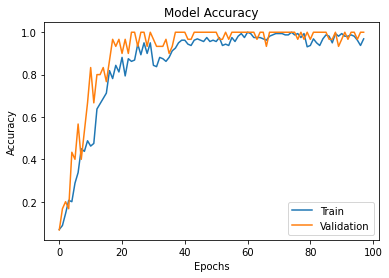

In [12]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [13]:
# Lưu lại
model.save("Final.h5")

In [14]:
model_CNN=load_model('Final.h5')

banh_bot_loc


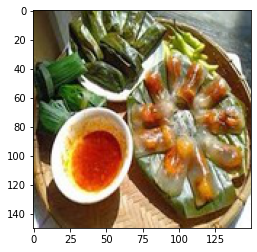

In [15]:
img=load_img("/content/drive/MyDrive/mon_an/test/banhbotloc/z3430079720965_72158e2c9f6e6ce7d4b18190005ca99e.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='banh_bot_loc'
if round(result[0][1])==1:
  prediction='banh_can'
if round(result[0][2])==1:
  prediction='banh_trang'
if round(result[0][3])==1:
  prediction='ca_nguoi_dai_duong'
if round(result[0][4])==1:
  prediction='ca_tam'
if round(result[0][5])==1:
  prediction='dau_hu'
if round(result[0][6])==1:
  prediction='dau_phong'
if round(result[0][7])==1:
  prediction='keo_duong'
if round(result[0][8])==1:
  prediction='nem_chua'
if round(result[0][9])==1:
  prediction='sun_ga'
print(prediction)

dau_hu


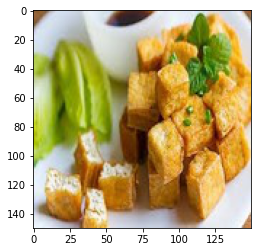

In [16]:
img=load_img("/content/drive/MyDrive/mon_an/test/dauhu/z3430197929477_a81e6f35daa05c97f8de46f6d06e918d.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='banh_bot_loc'
if round(result[0][1])==1:
  prediction='banh_can'
if round(result[0][2])==1:
  prediction='banh_trang'
if round(result[0][3])==1:
  prediction='ca_nguoi_dai_duong'
if round(result[0][4])==1:
  prediction='ca_tam'
if round(result[0][5])==1:
  prediction='dau_hu'
if round(result[0][6])==1:
  prediction='dau_phong'
if round(result[0][7])==1:
  prediction='keo_duong'
if round(result[0][8])==1:
  prediction='nem_chua'
if round(result[0][9])==1:
  prediction='sun_ga'
print(prediction)

ca_nguoi_dai_duong


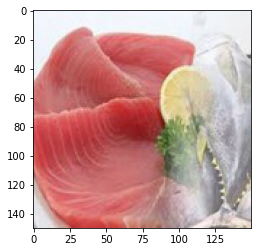

In [20]:
img=load_img("/content/drive/MyDrive/mon_an/test/canguoidaiduong/z3430174934425_b495c997d9844b866827d88a32b97fcf.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='banh_bot_loc'
if round(result[0][1])==1:
  prediction='banh_can'
if round(result[0][2])==1:
  prediction='banh_trang'
if round(result[0][3])==1:
  prediction='ca_nguoi_dai_duong'
if round(result[0][4])==1:
  prediction='ca_tam'
if round(result[0][5])==1:
  prediction='dau_hu'
if round(result[0][6])==1:
  prediction='dau_phong'
if round(result[0][7])==1:
  prediction='keo_duong'
if round(result[0][8])==1:
  prediction='nem_chua'
if round(result[0][9])==1:
  prediction='sun_ga'
print(prediction)